# Project 4 MOD300 : Notebook 

## Tangi Le Ninan 

## Christopher Rey 


Pylint grade : Your code has been rated at 3.72/10

# Task 0 : Install the python library from the page: milkyway-plot.readthedocs.io

For this task I created a conda environnement on wich I run the command "pip install mw_plot" specificly for the project 4. 

In [3]:
from unsupervized_learning import topic1_generation
import numpy as np

# Task 1 : Reproduce the image of the milky way via MWSkyMap 

In [4]:
generator=topic1_generation()

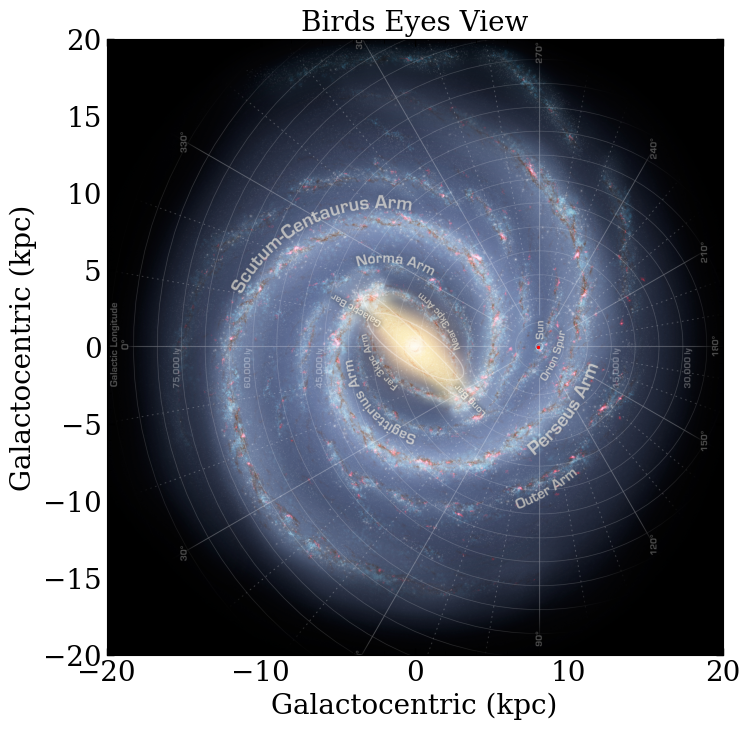

In [5]:
generator.generate_bird_eye_view()

# Task 2 :Generate a few visualizations of the milky way sector

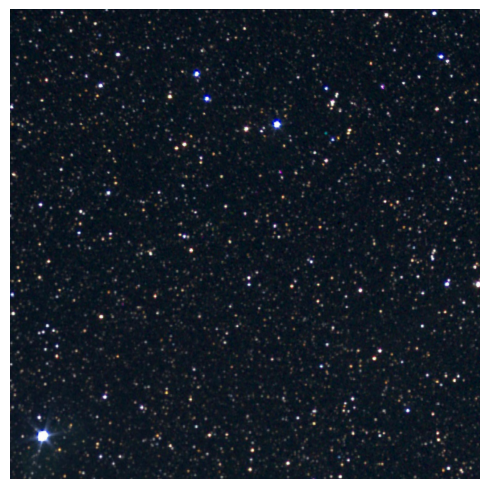

In [6]:
generator.generate_skymap(option="M31",name_png="M31.png",delete_axis=True)

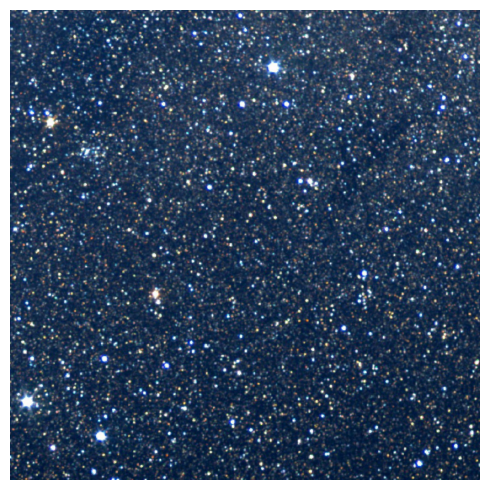

In [7]:
generator.generate_skymap(option="M42",name_png="M42.png",delete_axis=True)

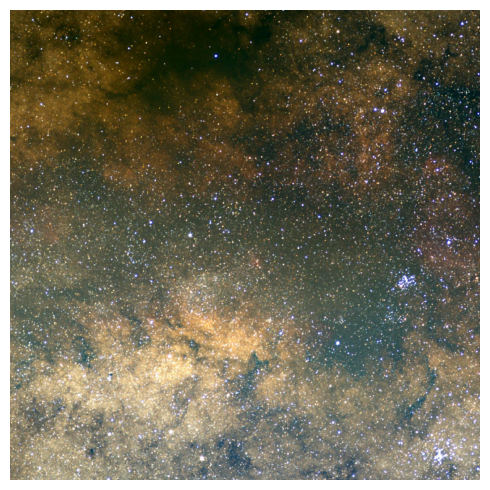

In [8]:
generator.generate_skymap(center=(0.0,0.0),radius=(18000,18000),name_png="center_radius_5.png",delete_axis=True)

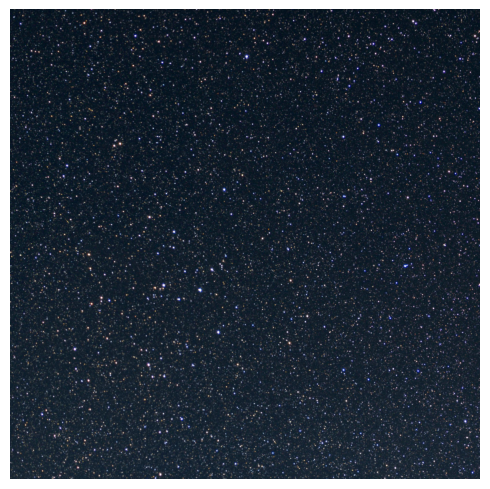

In [9]:
generator.generate_skymap(center=(-167.24,27.11),radius=(25000,25000),name_png="northern_pole.png",delete_axis=True)

# Reflexions on task 2. 

For my 3 representation I tested the "SkyMap" for the M42 wich is the orion Nebula, at the center of the Milky Way and to the North Pole.
I used the one In the center to see the changes in radius. 
For each plot I have to convert the the values of the center in degres first, for the radius I tested to use either arcsec wich are arc second or degres, to my interpretation it's easier to use degre because I'm use to it but the arcsec is more specific. 
1 degres =3600 arcsec

I also tested to change the radius for the plot in the center to know what is the size of the big hole dataset, wich is 90 degres. 

# Task 3 : Convert the image generated into a rgb np.array (each pixel will be a list of 3 number,Red, Green, Blue)

In [10]:
m31_array=generator.convert_png_to_rgb(img="M31.png")
m42_array=generator.convert_png_to_rgb(img="M42.png")
center_array=generator.convert_png_to_rgb(img="center_radius_5.png")
northern_array=generator.convert_png_to_rgb(img='northern_pole.png')

(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)


# Task 4 : Ideate, describe in words and generate a set of categories from the task 3 data

The goal of this task is to encode the array we created by separating the images into categories. Based on the generated images, I mainly observe two dominant groups: dark/red/grey tones (low intensity) and blue/white tones. As the next step, I will implement a function that selects an encoding style for each image. To do this, I will analyze the dominant color of each pixel and use it as the basis for the encoding

Number of pixels clustered: 209439


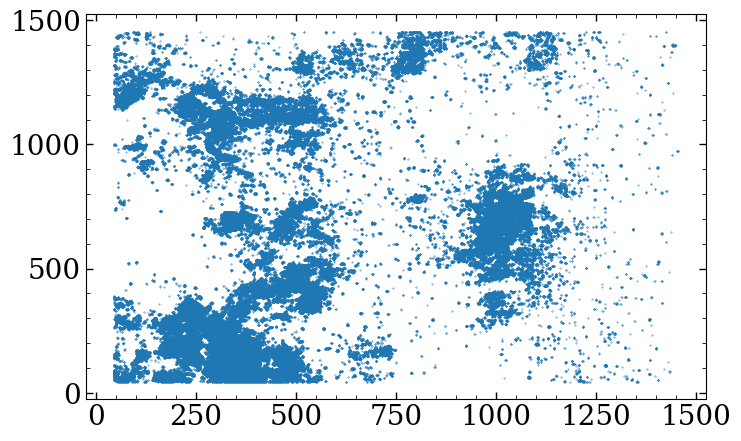

In [11]:
data=generator.encode_array(array=center_array,type='Red')
data_for_kmeans = np.column_stack(data)
print(f"Number of pixels clustered: {len(data[0])}")

# Task 5 : Use K-means to cluster the data

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\tangi\miniconda\envs\project_4_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\tangi\miniconda\envs\project_4_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\tangi\miniconda\envs\project_4_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 101: invalid start byte


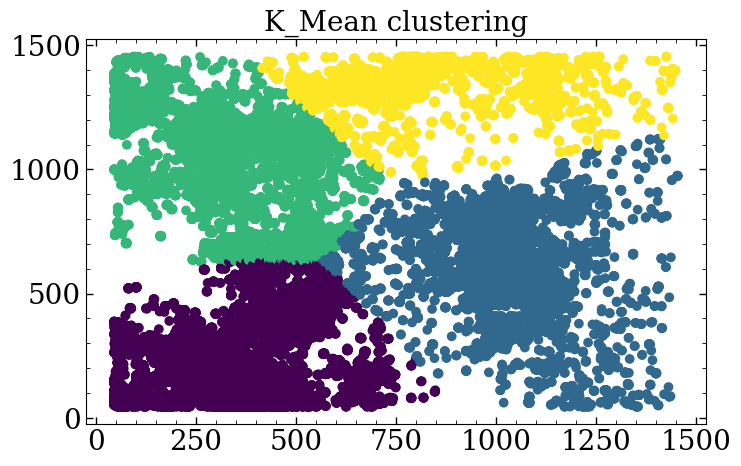

In [12]:
label=generator.k_mean_clustering(data=data_for_kmeans)

# Task 6 : Over-impose your cluster to the image generated in task 2

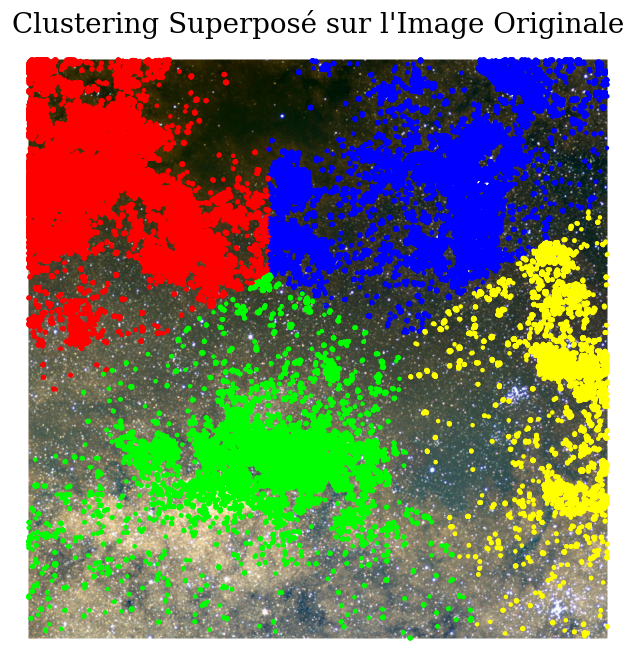

In [13]:
generator.over_impose(image_array=center_array,data_kmean=data_for_kmeans,labels=label)


Number of pixels clustered: 37406


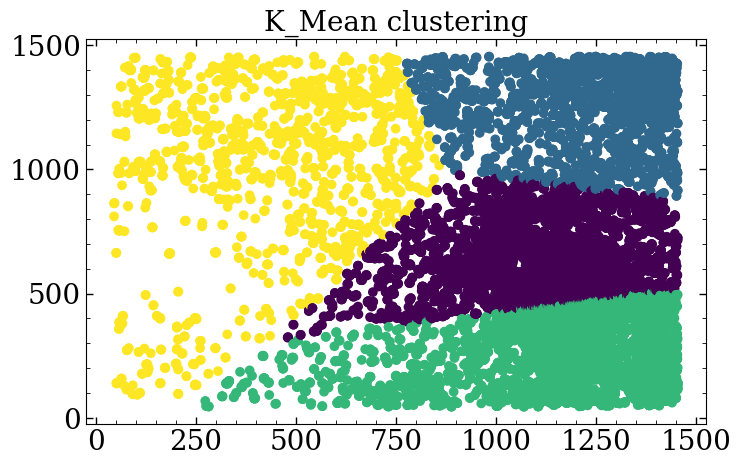

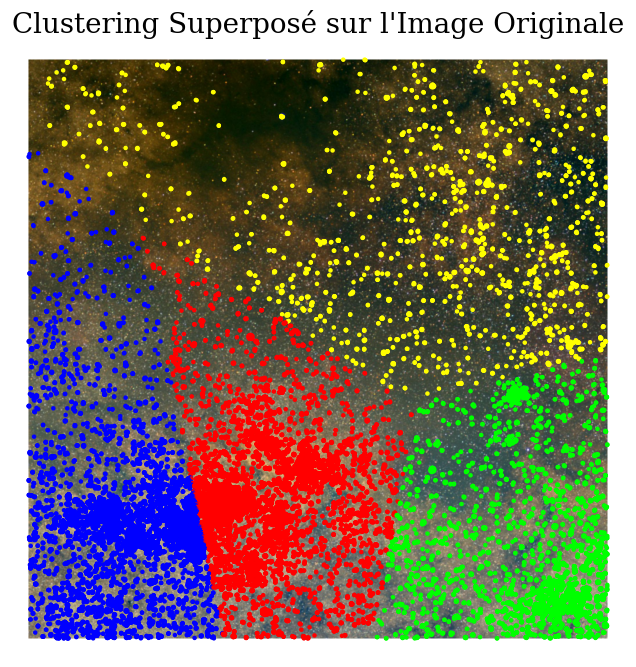

In [14]:
generator.run(array=center_array,type="Grey")

# Task 7 : What can we learn from an unsupervised model of our galaxy ? 

This unsupervised model helps identify different regions of the galaxy. The Dark and Grey encodings highlight areas where dust clouds are located, allowing us to see where dust is concentrated. The Red encoding isolates emission nebulae (ionized hydrogen), which are typically associated with active star-forming regions. The Blue encoding emphasizes young, hot stars or areas of diffuse gas. Altogether, these channels provide a meaningful representation of the galaxy and its main structural components.

For the clustering step, we use the K-means method, where clusters are formed by minimizing the distance between each data point and the centroid. This allows us to analyze how the encoded features are distributed. Through this approach, we can identify groupings of nebulae, star-forming regions, and stellar populations. The Grey and Dark clusters, for example, separate different dust regions, giving us insight into the spatial structure of the Milky Way and highlighting particular areas of interest. The spacing between clusters also provides information about their density and heterogeneity, which can be useful for understanding the physical properties of these regions.

Overall, this study provides statistical insights and meaningful groupings that could serve as a foundation for more detailed astrophysical investigations in the future.

# Topic 2 : Supervised learning: Machines versus human models, who can save the world??

# Task 0 : Reproduce project 2 exercice 5 

In [15]:
from supervized_learning import plot_dataset,lstm

# This part of the code include Task 1 and 2.

Curve-fit: beta0=0.24400232119888524, lambda=0.0017492630323584165.

Train size: 62   Test size: 28


c:\Users\tangi\miniconda\envs\project_4_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Begining of training ...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


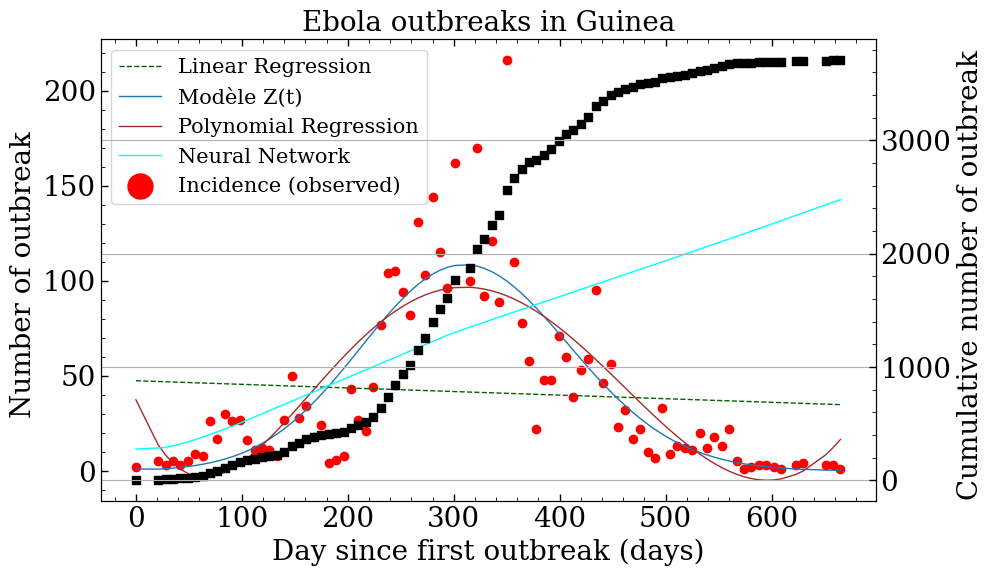

Curve-fit: beta0=0.39221912655982727, lambda=0.005833665956370848.

Train size: 34   Test size: 15
Begining of training ...


c:\Users\tangi\miniconda\envs\project_4_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


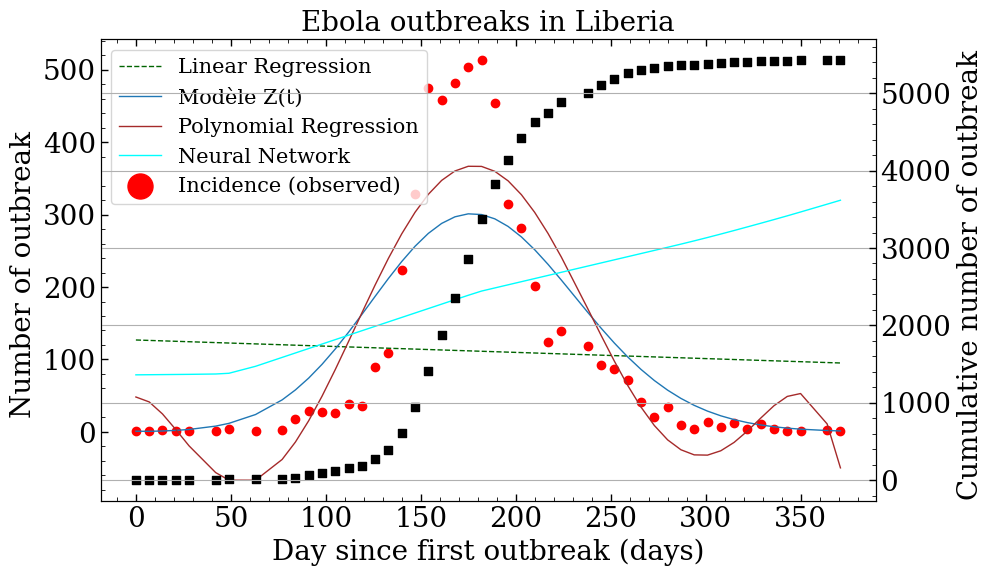

Curve-fit: beta0=0.458995647143312, lambda=0.00715600865391839.

Train size: 45   Test size: 20
Begining of training ...


c:\Users\tangi\miniconda\envs\project_4_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


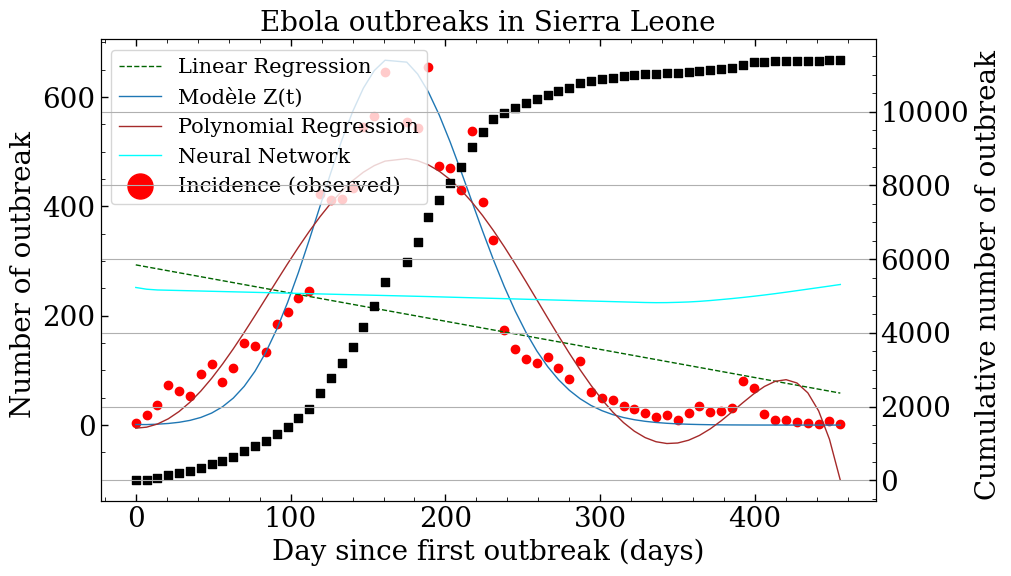

In [16]:
odeint_bool = True
polynomial_bool=True
linear_bool=True
NN_bool=True
plot_dataset(dataset="Guinea",linear=linear_bool,odeint=odeint_bool,polynomial=polynomial_bool,order_polynomial=5,nn=NN_bool)
plot_dataset(dataset="Liberia",linear=linear_bool,odeint=odeint_bool,polynomial=polynomial_bool,order_polynomial=6,nn=NN_bool)
plot_dataset(dataset="Sierra Leone",linear=linear_bool,odeint=odeint_bool,polynomial=polynomial_bool,order_polynomial=6,nn=NN_bool)

# Task 1 : 

I used scikit-learn’s LinearRegression model on the dataset. As the results show, linear regression is not very accurate for this problem—it only captures a broad trend in the outbreak. This approach does not allow us to estimate key features such as the outbreak’s peak or its true end point.It's a good start to approach the dataset. 

# Task 2 :
For this task, since the data clearly does not follow a first-degree (linear) function, we explored higher-degree polynomial models. To do this, we used scikit-learn’s PolynomialFeatures combined with a linear model. This approach provides much better results—still not perfect, of course, but significantly improved compared to Task 1.

I began testing with a second-degree polynomial, which already produced a better fit. Increasing the degree up to 6 continued to improve the curve’s alignment with the data. However, beyond degree 6, the model begins to overfit, and the polynomial starts to lose accuracy due to over-calculation and excessive sensitivity to small variations in the data.

# Task 3 Explanation 

For this task I  used StandarScaler and Dense from Sklearn. The result are pretty bad, because a classic Neural Network treat the data independently and in our case we have time dependent data NN will not be accurate. We will discuss about the accuracy more in Task 5. 

In [ ]:
lstm(dataset="Guinea")

Train rows: 72 | Test rows: 18
X_train: (57, 15, 1) y_train: (57, 1)
X_test: (18, 15, 1) y_test: (18, 1)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 15, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 15, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 581ms/step - loss: 0.1216 - val_loss: 0.0033
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0667 - val_loss: 0.0257
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0468 - val_loss: 0.0571
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0469 - val_loss: 0.0463
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0430 - val_loss: 0.0294
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0373 - val_loss: 0.0184
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0337 - val_loss: 0.0148
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0381 - val_loss: 0.0144
Epoch 9/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0403 - val_loss: 0.0171
Epoch 10/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0366 - val_loss: 0.0214
Epoch 11/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0325 - val_loss: 0.0265
Epoch 12/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0308 - val_lo

Train rows: 52 | Test rows: 13
X_train: (42, 10, 1) y_train: (42, 1)
X_test: (13, 10, 1) y_test: (13, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 535ms/step - loss: 0.2403 - val_loss: 0.0028
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1233 - val_loss: 0.0201
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0743 - val_loss: 0.0386
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0845 - val_loss: 0.0337
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0794 - val_loss: 0.0231
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0693 - val_loss: 0.0202
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0687 - val_loss: 0.0226
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0637 - val_loss: 0.0236
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0610 - val_loss: 0.0222
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0545 - val_loss: 0.0228
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0512 - val_loss: 0.0273
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0496 - v

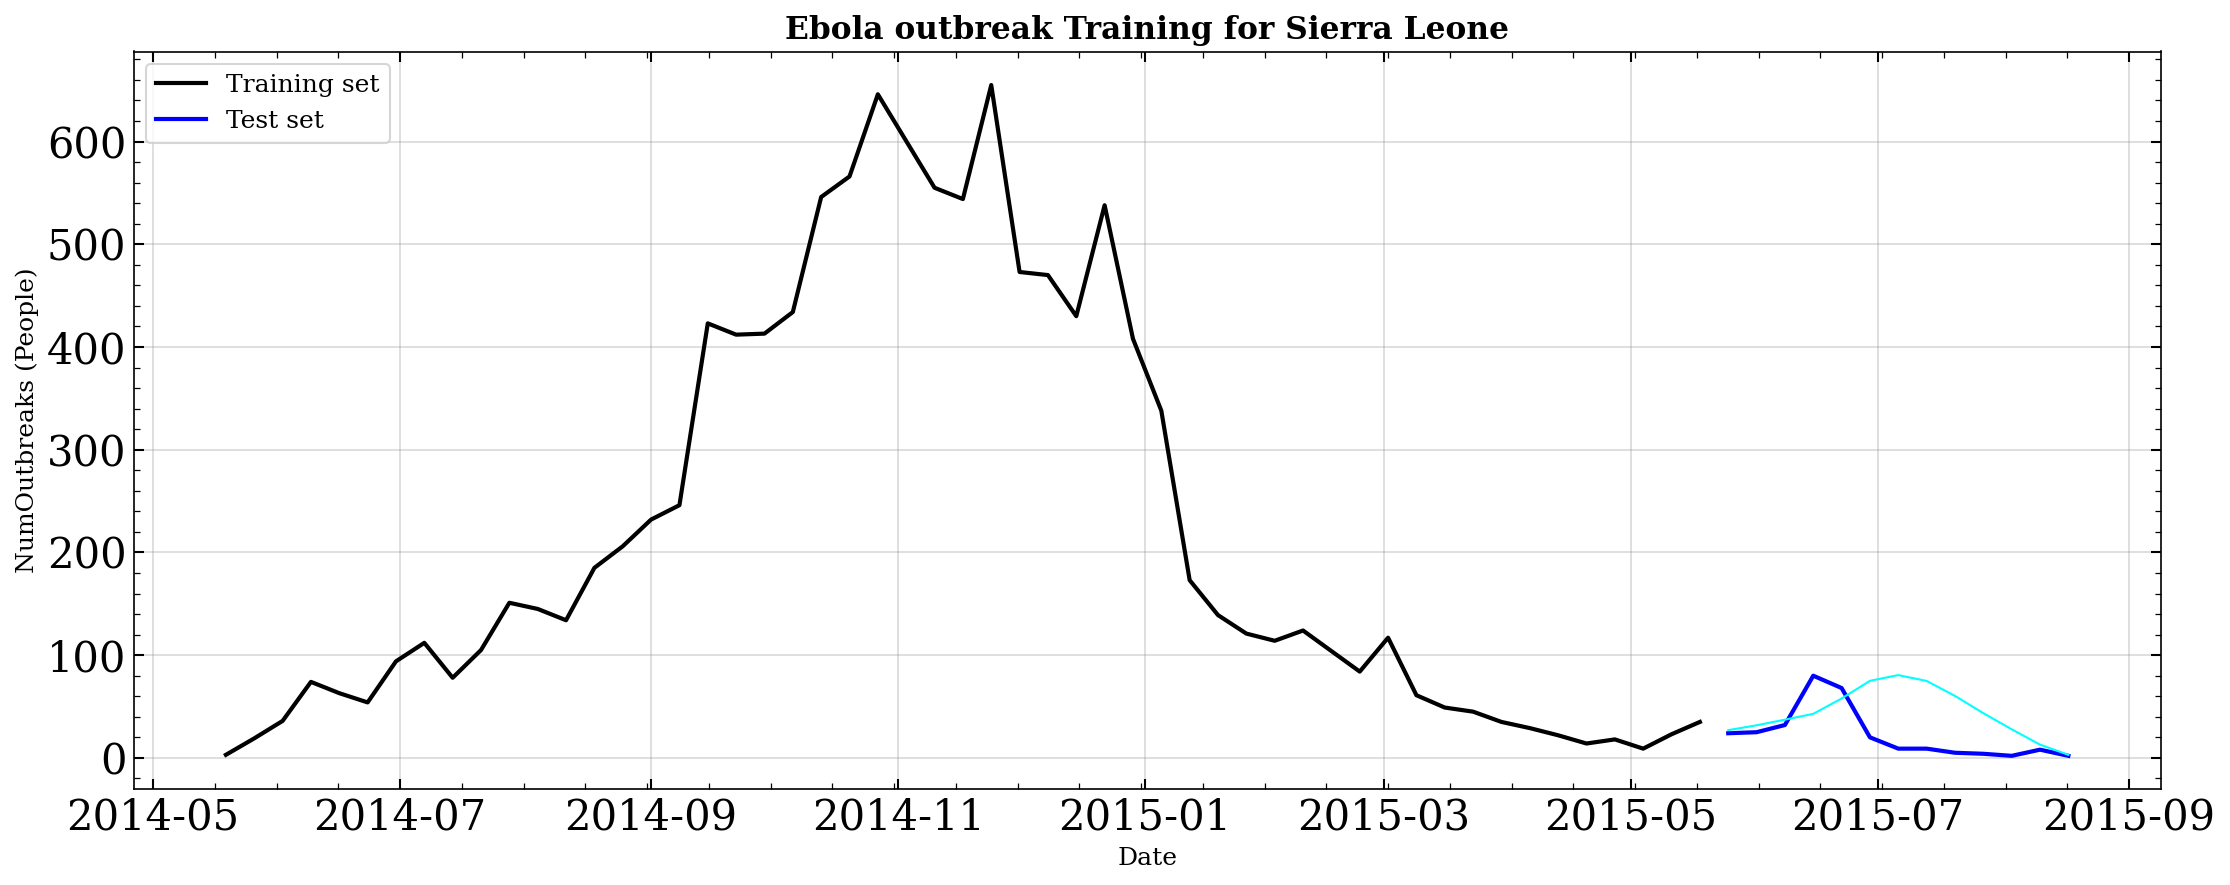

In [ ]:
lstm(dataset="Sierra Leone")

Train rows: 38 | Test rows: 11
X_train: (28, 10, 1) y_train: (28, 1)
X_test: (11, 10, 1) y_test: (11, 1)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.2501 - val_loss: 0.0036
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.1853 - val_loss: 0.0269
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.1389 - val_loss: 0.0686
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.1411 - val_loss: 0.0922
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.1358 - val_loss: 0.0844
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.1246 - val_loss: 0.0658
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.1126 - val_loss: 0.0497
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.1088 - val_loss: 0.0399
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.1075 - val_loss: 0.0366
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.1065 - val_loss: 0.0381
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0990 - val_loss: 0.0444
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.1001

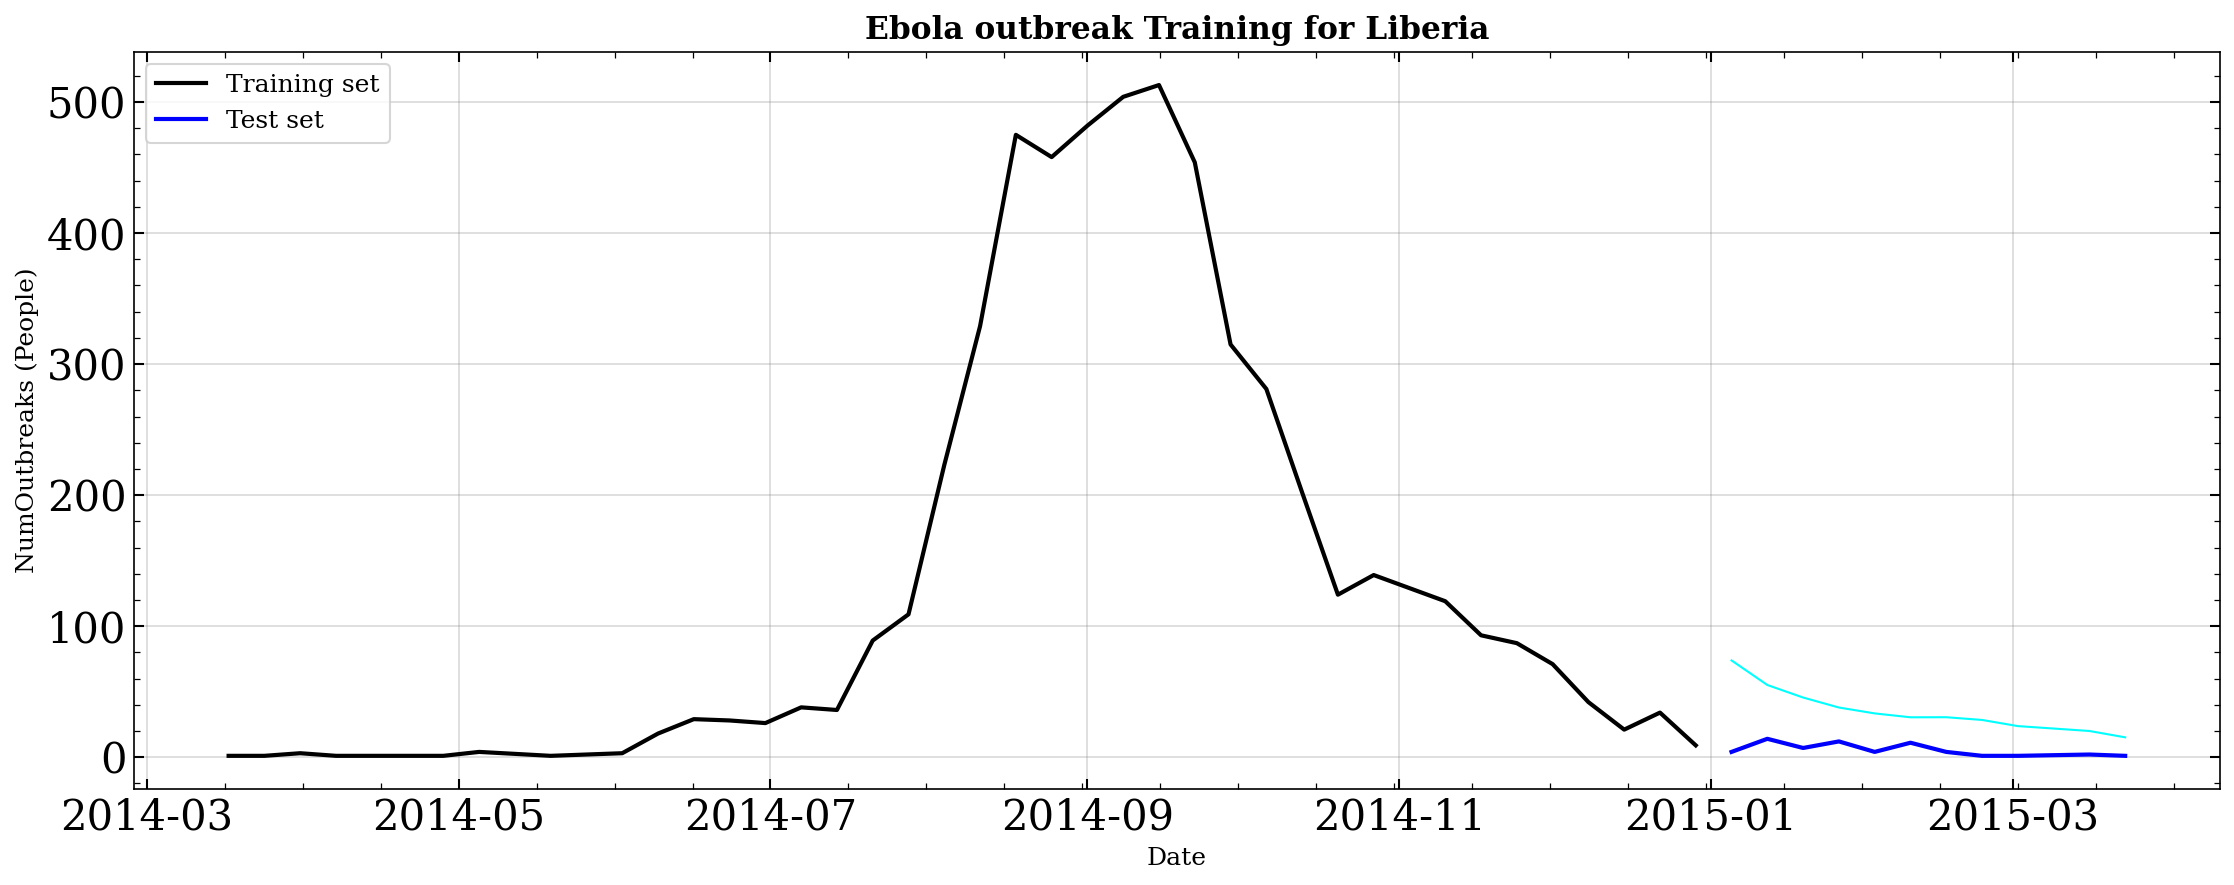

In [ ]:
lstm(dataset="Liberia")

# Task 4 : The LSTM 

For this task, I used MinMaxScaler, dropout regularization, LSTM (Long Short-Term Memory), and a model implementation in scikit-learn. LSTM is a type of recurrent neural network suited for time-dependent data. To use it properly, I converted the dataset to datetime format and made sure not to shuffle the data. In the code, I define a “window size,” which determines how many past data points the model examines in order to predict the next point.

LSTM is a model with many parameters, the epochs wich is a complete training cycle where the model saw the entire training dataset once and the batch size is the number of training samples that are propagated through the network before the model weights are updated. Those parameters are very important to have a good prediction and prevent overfitting or under learning. 

Also, the LSTM figure looks different because I chose to use the actual dates rather than the number of days since the outbreak. I found this approach easier since it was more similar to the methods I had used before.

# Task 5 : Can we ignore modeling and let Machine Leaning make prediction? What is a good prediction for these cases? What are your conclusions?

To start with the least accurate approaches: the linear regression performed poorly. This is expected, since a first-degree linear function is too simple to capture the complex dynamics of an Ebola outbreak. The behavior of such an epidemic is highly nonlinear, so a straight line cannot approximate it effectively.

The neural network also produced weak results. Because a basic feedforward NN treats each data point independently and does not incorporate information from previous days, it struggles to understand how an outbreak evolves over time. With no memory of past values, the model cannot learn trends or fluctuations in the number of cases. As a result, both linear regression and a simple NN were not suitable for this type of time-dependent data.
Polynomial regression performs better because it can capture more complex patterns. Increasing the polynomial degree improves the fit and yields predictions that are closer to those obtained using the mechanistic modeling approach with the odeint solution. Although it may risk overfitting if taken too far, in this context it offers a more realistic approximation than the simpler models
Finally, the LSTM model is among the most accurate methods we tested. While its predictions still have a notable margin of error, the model successfully captures the overall trend of the outbreak. Because LSTMs incorporate past information, they are well suited for time-series prediction and can provide valuable insight into whether the number of cases is likely to rise or fall.

In the context of disease outbreaks, an accurate prediction does not always require exact numbers. Often, what matters most is understanding the trend, are cases increasing, stabilizing, or decreasing. For this purpose, machine-learning methods—especially those designed for time series—may be sufficient. However, if we need highly precise estimates, mechanistic modeling can offer better reliability.
Overall, both mechanistic models and machine-learning approaches are valuable. The key is to understand what type of information we need and how much precision is required. Selecting the appropriate method depends entirely on the goals and constraints of the analysis.

# REFERENCES 

## Converti images to numpy array 
https://www.geeksforgeeks.org/python/how-to-convert-images-to-numpy-array/

## Regression polynomial 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://data36.com/polynomial-regression-python-scikit-learn/
# Encoding 
https://mmuratarat.github.io/2020-05-13/rgb_to_grayscale_formulas

# plot adjustment 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
## AI usage 

To aquire information on the different type of encoding for Task 4 Topic 1